In [1]:
import matplotlib.pyplot as plt
from sympy import *
from sympy.plotting import plot
from sympy.printing.latex import LatexPrinter
from sympy.core.function import _coeff_isneg, AppliedUndef, Derivative
from sympy.printing.precedence import precedence, PRECEDENCE
from spb import *
from scipy.integrate import quad
import numpy as np
import pandas as pd

In [2]:
class CustomPrint(LatexPrinter):
    def _print_Derivative(self, expr):
        diff_symbol = r'\partial'

        
        tex = "" 
        dim = 0
        for x, num in reversed(expr.variable_count):
            dim += num
            if num == 1:
                tex += r"%s %s" % (diff_symbol, self._print(x))
            else:
                tex += r"%s %s^{%s}" % (diff_symbol,
                                        self.parenthesize_super(self._print(x)),
                                        self._print(num))

        if dim == 1:
            tex = r"\frac{%s}{%s}" % (diff_symbol, tex) 
        else:
            tex = r"\frac{%s^{%s}}{%s}" % (diff_symbol, self._print(dim), tex) 

        if any(_coeff_isneg(i) for i in expr.args):
            return r"%s %s" % (tex, self.parenthesize(expr.expr,
                                                  PRECEDENCE["Mul"],
                                                  is_neg=True,
                                                  strict=True))

        return r"%s %s" % (tex, self.parenthesize(expr.expr,
                                                  PRECEDENCE["Mul"],
                                                  is_neg=False,
                                                  strict=True))
        
def custom_print_func(expr, **settings):
    return CustomPrint().doprint(expr)

In [3]:
init_printing(use_latex=True,latex_mode="plain",latex_printer=custom_print_func)
plt.rcParams['figure.figsize'] = 10, 8

In [4]:
x1,x2,m,p1,p2,mux1,λ = symbols('x1 x2 m p1 p2 mux1 λ')

###### Utility function

In [5]:
U = Function('U')(x1,x2)
Eq(U,(x1**0.5)*(x2**0.5))
# Where x1= quantity of good 1, x2= quantity of good 2

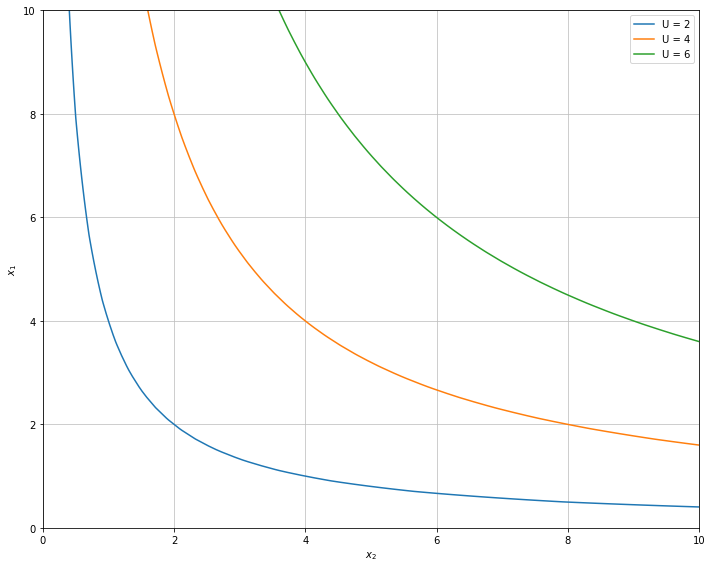

In [6]:
# We can use this function to get our indifference curves
# This curves show each possible combination of goods for a given utility
u_ex = 2 # Example utility
plot_1 = plot_implicit(Eq(u_ex,(x1**0.5)*(x2**0.5)),label = f'U = {u_ex}',xlim=[0,10],ylim=[0,10],legend=True,show=False)
u_ex = 4 # Example utility
plot_2 = plot_implicit(Eq(u_ex,(x1**0.5)*(x2**0.5)),label = f'U = {u_ex}',xlim=[0,10],ylim=[0,10],legend=True,show=False)
u_ex = 6 # Example utility
plot_3 = plot_implicit(Eq(u_ex,(x1**0.5)*(x2**0.5)),label = f'U = {u_ex}',xlim=[0,10],ylim=[0,10],legend=True,show=False)
plot_1.append(plot_2[0])
plot_1.append(plot_3[0])
plot_1.show()

In [7]:
# This function is a Cobb-Douglas utility function
# Lets see other utility functions

###### Perfect substitutes

In [8]:
Eq(U,x1+x2)
# Where x1= quantity of good 1, x2= quantity of good 2

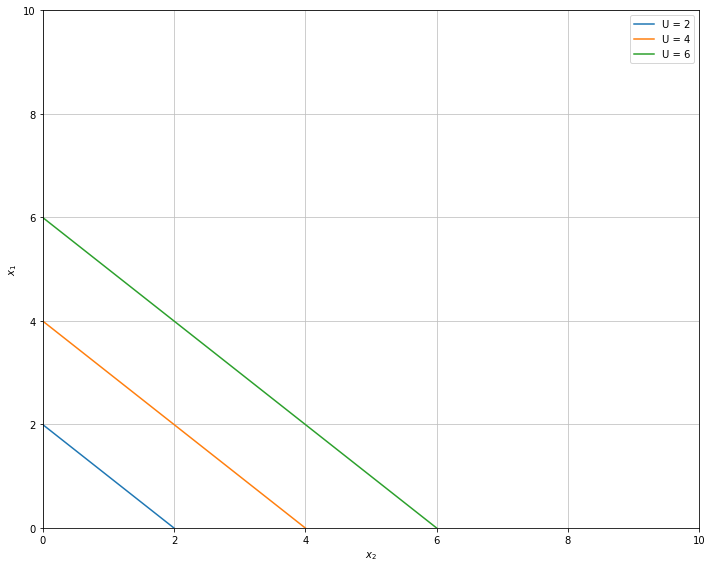

In [9]:
# We can use this function to get our indifference curves
u_ex = 2 # Example utility
plot_1 = plot_implicit(Eq(u_ex,x1+x2),label = f'U = {u_ex}',xlim=[0,10],ylim=[0,10],legend=True,show=False)
u_ex = 4 # Example utility
plot_2 = plot_implicit(Eq(u_ex,x1+x2),label = f'U = {u_ex}',xlim=[0,10],ylim=[0,10],legend=True,show=False)
u_ex = 6 # Example utility
plot_3 = plot_implicit(Eq(u_ex,x1+x2),label = f'U = {u_ex}',xlim=[0,10],ylim=[0,10],legend=True,show=False)
plot_1.append(plot_2[0])
plot_1.append(plot_3[0])
plot_1.show()

In [10]:
# As in this case both goods are perfect substitutes, the consumer can choose to buy only one of them

###### Perfect complementaries

In [11]:
Eq(U,Min(x1,x2))
# Where x1= quantity of good 1, x2= quantity of good 2

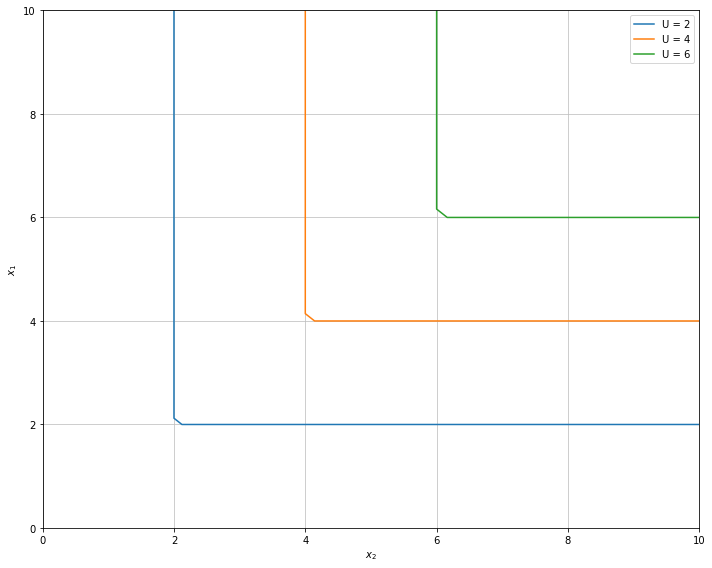

In [12]:
# We can use this function to get our indifference curves
u_ex = 2 # Example utility
plot_1 = plot_implicit(Eq(u_ex,Min(x1,x2)),label = f'U = {u_ex}',xlim=[0,10],ylim=[0,10],legend=True,show=False)
u_ex = 4 # Example utility
plot_2 = plot_implicit(Eq(u_ex,Min(x1,x2)),label = f'U = {u_ex}',xlim=[0,10],ylim=[0,10],legend=True,show=False)
u_ex = 6 # Example utility
plot_3 = plot_implicit(Eq(u_ex,Min(x1,x2)),label = f'U = {u_ex}',xlim=[0,10],ylim=[0,10],legend=True,show=False)
plot_1.append(plot_2[0])
plot_1.append(plot_3[0])
plot_1.show()

In [13]:
# In this case, the consumer needs both goods, and getting more of one without increasing the other does not increase utility

###### Total and marginal utility

In [14]:
# Let say we know the price of good 1, and we can choose how much we are going to buy
# Each unit we buy, gives us a different utility level
# This happens because at a certain point, the consumer gets 'tired' and each new unit leaves him worse than before
# With this we can create a utility table
units_bought = np.arange(1,11,1)
total_utility = [1,2,3,4,4.5,5,5.5,5,4.5,4]
utility_table = pd.DataFrame(data={'units':units_bought,'total utility':total_utility})

In [15]:
# We get the following table
utility_table

,units,total utility
0,1,1.0
1,2,2.0
2,3,3.0
3,4,4.0
4,5,4.5
5,6,5.0
6,7,5.5
7,8,5.0
8,9,4.5
9,10,4.0


In [16]:
# Now we can calculate marginal utility
marginal_utilities = []
for i in utility_table.index:
    if i == 0:
        marginal_utilities.append(0)
    else:
        marginal_utilities.append(utility_table['total utility'][i] - utility_table['total utility'][i-1])
utility_table['marginal utility'] = marginal_utilities
utility_table

,units,total utility,marginal utility
0,1,1.0,0.0
1,2,2.0,1.0
2,3,3.0,1.0
3,4,4.0,1.0
4,5,4.5,0.5
5,6,5.0,0.5
6,7,5.5,0.5
7,8,5.0,-0.5
8,9,4.5,-0.5
9,10,4.0,-0.5


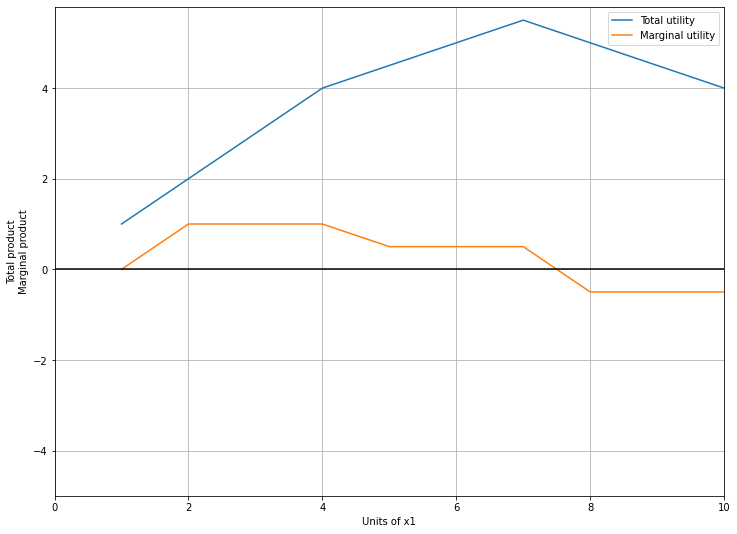

In [17]:
fig,ax = plt.subplots(figsize=(12,9))
ax.plot(utility_table['units'],utility_table['total utility'],label='Total utility')
ax.plot(utility_table['units'],utility_table['marginal utility'],label='Marginal utility')
ax.hlines(0,xmin=0,xmax=10,color='black')
plt.xlim(0,10)
plt.ylim(-5)
plt.xlabel('Units of x1')
plt.ylabel('Total product\nMarginal product')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# We can get the marginal utility function for each good simply by deriving the function for that good
# Example, marginal utility of x1
Eq(mux1,diff((x1**0.5)*(x2**0.5),x1))

###### Budget constraint

In [19]:
# Each consumer has a certain income level
# We will assume that the income the consumer receives is made by selling goods 1 and 2
# Income looks like this
Eq(m,p1*x1+p2*x2)
# Where x1= quantity of good 1, x2= quantity of good 2, p1 = price of good 1, p2 = price of good 2

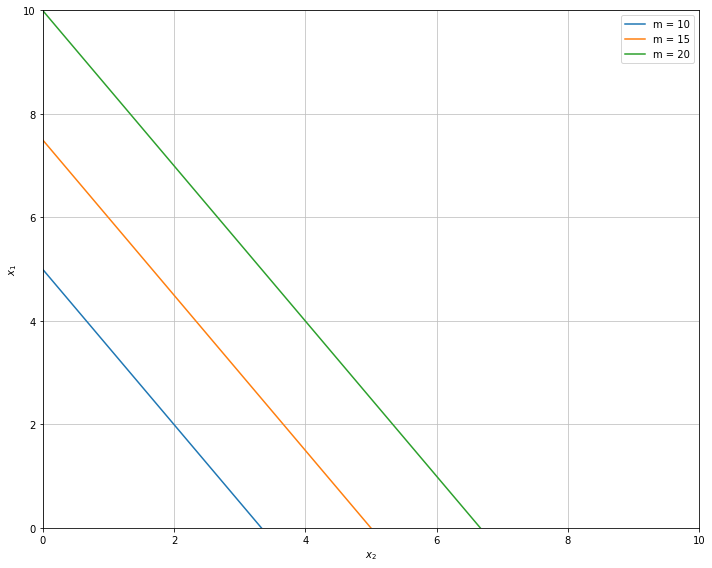

In [20]:
# Lets say p1=2 and p2=3
# Now we can plot our budget constraint, for each income level
i_ex = 10 # Example income
plot_1 = plot_implicit(Eq(i_ex,2*x1+3*x2),label = f'm = {i_ex}',xlim=[0,10],ylim=[0,10],legend=True,show=False)
i_ex = 15 # Example income
plot_2 = plot_implicit(Eq(i_ex,2*x1+3*x2),label = f'm = {i_ex}',xlim=[0,10],ylim=[0,10],legend=True,show=False)
i_ex = 20 # Example income
plot_3 = plot_implicit(Eq(i_ex,2*x1+3*x2),label = f'm = {i_ex}',xlim=[0,10],ylim=[0,10],legend=True,show=False)
plot_1.append(plot_2[0])
plot_1.append(plot_3[0])
plot_1.show()

###### Optimum consumer choice

In [21]:
# Lets say we have a Cobb-Douglas utility function
U = Function('U')(x1,x2)
Eq(U,(x1**0.5)*(x2**0.5))
# Where x1= quantity of good 1, x2= quantity of good 2

In [22]:
# Our budget constraint (with p1=2 and p2=3)
Eq(m,2*x1+3*x2)
# Where x1= quantity of good 1, x2= quantity of good 2

In [23]:
# Now we have to maximize our utility, given our budget constraint
# We get the following function
l = Function('l')(x1,x2,λ)
Eq(l,(x1**0.5)*(x2**0.5)-λ*(2*x1+3*x2-m))
# Where x1= quantity of good 1, x2= quantity of good 2 and m = income

In [24]:
# Now we get the partial derivatives
# First for x1
diff_1 = diff((x1**0.5)*(x2**0.5)-λ*(2*x1+3*x2-m),x1)
diff_1

In [25]:
# Second for x2
diff_2 = diff((x1**0.5)*(x2**0.5)-λ*(2*x1+3*x2-m),x2)
diff_2

In [26]:
# Third for λ
diff_3 = diff((x1**0.5)*(x2**0.5)-λ*(2*x1+3*x2-m),λ)
diff_3

In [27]:
# We solve the first equation to λ
sol_1 = solve(diff_1,λ)[0]
sol_1

In [28]:
# We solve the second equation to λ
sol_2 = solve(diff_2,λ)[0]
sol_2

In [29]:
# Now we can equal these two solutions and solve again for one of the variables, in this case x1
sol_3 = solve(sol_1 - sol_2,x1)[0]
Eq(x1,sol_3)
# This means that one unit of x1 equals the solution
# This is our marginal rate of substitution (MRS)
# Now we know that all combinations that respect this condition, are optimal

In [30]:
# Our utility function now looks like this
Eq(U,(1.5*x2**0.5)*(x2**0.5))

In [31]:
# Our income function now looks like this
Eq(m,2*1.5*x2+3*x2)

In [32]:
# Example
# Lets say we our income equals 10, we can use this to know how much x1 and x2 we can get
m_ex = 10
x2_ex = solve(2*1.5*x2+3*x2 - m_ex,x2)[0]
x2_ex
# This is the x2 we can get

In [33]:
# Now with our MRS we can get the x1 we can get
x1_ex = 1.5 * x2_ex
x1_ex

In [34]:
# This allows us to know how much utility we get from this combination
u_ex = (x1_ex**0.5)*(x2_ex**0.5)
u_ex
# Now we can plot this problem

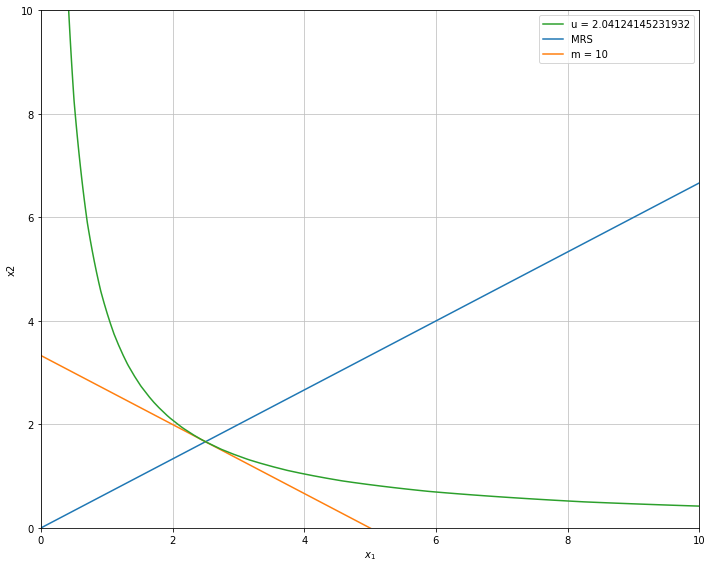

In [35]:
p1 = plot(x1/1.5,label = 'MRS',legend=True,ylabel='x2',xlim=[0,10],ylim=[0,10],show=False)
p2 = plot((m_ex-2*x1)/3,label = f'm = {m_ex}',legend=True,show=False)
p3 = plot_implicit(Eq(u_ex,(x1**0.5)*(x2**0.5)),label = f'u = {u_ex}',legend=True,show=False)
p1.append(p2[0])
p1.append(p3[0])
p1.show()
# As we can see, there is tangency between our indifference curve and our budget constraint exactly 
# where the MRS curve is